# k-means算法解释    

### 一、引用的包和中文绘图设置

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import time

# 设置图像中文字体为黑体
mpl.rc("font", family="SimHei")
# 解决坐标轴负号不显示
mpl.rcParams['axes.unicode_minus'] = False

## 二、定义

### 1. 计算两点欧式距离的平方  
为了代码简洁, 定义欧式距离的平方:

In [2]:
def dist(a, b):
    """ a和b点的距离的平方 """
    return np.dot(a - b, a - b)

### 2. 集合`k-means`算法:

#### 数据的初始化  
1. 令聚类个数$k=5$, 数据样本量$n=100$且都是二维数据,
1. 接下来生成样本矩阵, 其中矩阵每一行代表一个数据, 前两列代表数据的横纵坐标, 第三列代表数据的标签, 初始化为-1.

#### 迭代  
设置距离矩阵, 初始化为0, 然后以500为迭代次数进行迭代, 在每一次迭代中:  
1. 先计算每个样本与均值向量的距离, 更新距离矩阵,
2. 再进行分类, 将每个点标签更新为距离最近的均值向量的编号,
3. 最后更新均值向量, 将取每一个新聚簇中的点的均值, 之后不断迭代, 直到达到次数.

#### 损失函数  
损失函数定义为每个点到对应聚簇均值向量的距离的平方和.

#### 可视化  
最后利用`matplotlib`库将结果可视化:

In [3]:
class kmean():
    """ k均值算法 """
    
    def __init__(self, k=5, n=100):
        """ k均值数据生成和初值选取 """
        # 聚类k个数和数据n个数
        self.k = k
        self.n = n
        # 生成的数据矩阵,最后一列是点的标签
        self.data = np.random.randn(self.n, 3) * 10
        for i in range(0, self.n):
            self.data[i, 2] = -1
        # 选取初始向量
        mu = np.random.randint(low=0, high=self.n, size=self.k)
        self.mean = np.full((self.k, 2), 0.0)
        for i in range(0, self.k):
            for j in [0, 1]:
                self.mean[i, j] = self.data[mu[i], j]

    def iteration(self):
        """ 迭代 """
        # 点到均值向量的距离矩阵
        self.distm = np.full((self.n, self.k), 0.0)
        # 迭代
        iter = 500
        for t in range(0, iter):
            # 计算距离
            for i in range(0, self.n):
                for j in range(0, self.k):
                    self.distm[i, j] = dist(self.data[i, 0:2], self.mean[j, :])
            # 分类
            for i in range(0, self.n):
                self.data[i, 2] = np.argmin(self.distm[i, :])
            # 更新均值向量
            for i in range(0, self.k):
                smean = (0.0, 0.0)
                num = 0
                for j in range(0, self.n):
                    if self.data[j, 2] == i:
                        smean = smean + self.data[j, 0:2]
                        num = num + 1
                if num != 0:
                    self.mean[i, :] = [i / num for i in smean]

    def Loss(self):
        """ 损失函数值 """
        loss = 0
        for i in range(0, self.k):
            for j in range(0, self.n):
                if self.data[j, 2] == i:
                    loss = loss + dist(self.data[j, 0:2], self.mean[i, :])
        print("原损失函数值: ", loss)

    def kmeanplt(self):
        """ 数据可视化 """
        colors = ['red', 'green', 'blue', 'purple', 'yellow']
        for i in range(0, self.k):
            x = []
            y = []
            for j in range(0, self.n):
                if self.data[j, 2] == i:
                    x.append(self.data[j, 0])
                    y.append(self.data[j, 1])
            plt.scatter(x, y, c=colors[i], s=10)
            plt.scatter(self.mean[i, 0], self.mean[i, 1], c=colors[i], s=100)
        plt.title("原k均值分类结果")
        plt.savefig("C:/Users/Zhang/Desktop/原k均值结果.pdf")
        plt.show()

## 三、程序实验  
在调用程序同时, 计算运行时间并打印:

原损失函数值:  4432.602734773326
运行时间: 0.8458878993988037 s


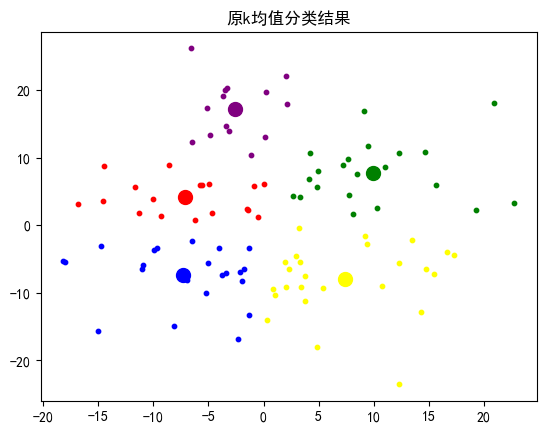

In [4]:
# 开始计算时间
start = time.time()
test = kmean()
test.iteration()
# 结束计算时间
end = time.time()
test.Loss()
print('运行时间: ' + str(end - start) + ' s')
test.kmeanplt()

# k-means改进算法解释